In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Reading Data

In [3]:
df = pd.read_csv('Dataset/NSL_new.csv')
df = df.sample(1000)

In [4]:
X = df.drop(['label'], axis=1)
y = df['label']

In [5]:
scoring_metrics={ 'accuracy' }

In [6]:
X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
1758,0,264,295,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
120433,0,225,188,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
78457,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
y.head()

1758       normal
8449      neptune
40571     neptune
120433     normal
78457      normal
Name: label, dtype: object

In [8]:
y = y.replace( to_replace =  'normal' , value = 0 )

y = y.replace( to_replace =  'neptune' , value = 1 )
y = y.replace( to_replace =  'back' , value = 1 )
y = y.replace( to_replace =  'land' , value = 1 )
y = y.replace( to_replace =  'pod' , value = 1 )
y = y.replace( to_replace =  'smurf' , value = 1 )
y = y.replace( to_replace =  'teardrop' , value = 1 )
y = y.replace( to_replace =  'mailbomb' , value = 1 )
y = y.replace( to_replace =  'apache2' , value = 1 )
y = y.replace( to_replace =  'processtable' , value = 1 )
y = y.replace( to_replace =  'udpstorm' , value = 1 )
y = y.replace( to_replace =  'worm' , value = 1 )

y = y.replace( to_replace =  'ipsweep' , value = 2 )
y = y.replace( to_replace =  'nmap' , value = 2 )
y = y.replace( to_replace =  'portsweep' , value = 2 )
y = y.replace( to_replace =  'satan' , value = 2 )
y = y.replace( to_replace =  'mscan' , value = 2 )
y = y.replace( to_replace =  'saint' , value = 2 )

y = y.replace( to_replace =  'ftp_write' , value = 3 )
y = y.replace( to_replace =  'guess_passwd' , value = 3 )
y = y.replace( to_replace =  'imap' , value = 3)
y = y.replace( to_replace =  'multihop' , value = 3 )
y = y.replace( to_replace =  'phf' , value = 3 )
y = y.replace( to_replace =  'spy' , value = 3 )
y = y.replace( to_replace =  'warezclient' , value = 3 )
y = y.replace( to_replace =  'warezmaster' , value = 3 )
y = y.replace( to_replace =  'sendmail' , value = 3 )
y = y.replace( to_replace =  'snmpgetattack' , value = 3 )
y = y.replace( to_replace =  'snmpguess' , value = 3 )
y = y.replace( to_replace =  'xlock' , value = 3 )
y = y.replace( to_replace =  'xsnoop' , value = 3 )
y = y.replace( to_replace =  'httptunnel' , value = 3 )

y = y.replace( to_replace =  'buffer_overflow' , value = 4 )
y = y.replace( to_replace =  'loadmodule' , value = 4 )
y = y.replace( to_replace =  'perl' , value = 4 )
y = y.replace( to_replace =  'rootkit' , value = 4 )
y = y.replace( to_replace =  'ps' , value = 4 )
y = y.replace( to_replace =  'sqlattack' , value = 4  )
y = y.replace( to_replace =  'xterm' , value = 4 )

y = y.replace( to_replace =  'unknown' , value = 5 )

In [9]:
y.head()

1758      0
8449      1
40571     1
120433    0
78457     0
Name: label, dtype: int64

# Recursive Feature Elemination

In [10]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# SVM

In [12]:
from sklearn import svm

In [13]:
svc = SVC(kernel="linear")

In [ ]:
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
ranking = rfecv.ranking_

# iterating the columns 
i = 0
for col in df.columns: 
    if( ranking[i] == 1 ):
        print(col) 
    i = i + 1

In [ ]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [13]:
randomForestModel = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)

In [14]:
rfecv = RFECV(estimator=randomForestModel, step=1, cv=StratifiedKFold(4),
              scoring="accuracy")

In [15]:
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [16]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 16


In [33]:
ranking = rfecv.ranking_

# iterating the columns 
i = 0
for col in df.columns: 
    if( ranking[i] == 1 ):
        print(col) 
    i = i + 1



src_bytes
dst_bytes
logged_in
count
srv_serror_rate
same_srv_rate
diff_srv_rate
dst_host_srv_count
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
protocol_type_icmp
flag_S0
flag_SF


IndexError: index 122 is out of bounds for axis 0 with size 122

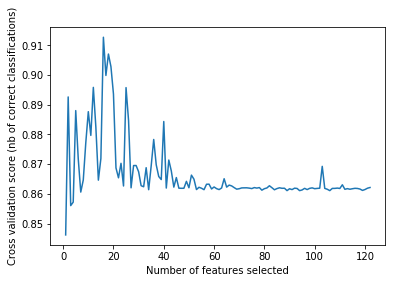

In [17]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Neural Network

In [135]:
from sklearn.neural_network import MLPClassifier

In [136]:
mlpModel = MLPClassifier()

In [137]:
mlpScore=cross_validate(mlpModel, X, y, cv=4, scoring=scoring_metrics, verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.0min finished


# Decision Trees

In [166]:
from sklearn.tree import tree

In [167]:
dt=tree.DecisionTreeClassifier()